In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
#load iris data set

data = load_iris()
print(data.data.shape)

#(150 samples, 4 features)
#iris has 3 different classes 
#features are: Sepal Length, Sepal Width, Petal Length, Petal Width

(150, 4)


([], [])

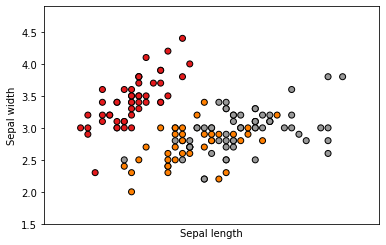

In [3]:
#seperate data

x = data.data[:,:2] #taking the two first feautures
y = data.target

x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+ 0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+ 0.5


plt.scatter(x[:,0],x[:,1],c=y, cmap= plt.cm.Set1, edgecolors = 'k')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.xticks(())

([], [])

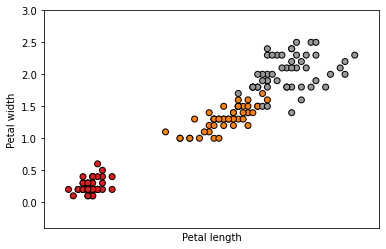

In [4]:
x = data.data[:,2:4] #taking the second two feautures
y = data.target

x_min, x_max = x[:,0].min()-0.5, x[:,0].max()+ 0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()+ 0.5


plt.scatter(x[:,0],x[:,1],c=y, cmap= plt.cm.Set1, edgecolors = 'k')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.xticks(())

In [5]:
#divide the data into training and testing set

x = data.data #data points/ samples
y = data.target #label/ classes

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20, random_state=42) #test size= testing 20% of data
nbr = NearestNeighbors(n_neighbors=3, algorithm="ball_tree") #definin the model 
nbr.fit(x_train) #trains model with x train



NearestNeighbors(algorithm='ball_tree', n_neighbors=3)

In [6]:
#finding the distance and indices frome ea training point

distance, indices = nbr.kneighbors(x_test.reshape(-1,4), return_distance=True)
print(distance.shape)
print(distance)
print(indices)

(30, 3)
[[0.2236068  0.3        0.43588989]
 [0.33166248 0.38729833 0.46904158]
 [0.41231056 0.54772256 0.89442719]
 [0.2        0.24494897 0.33166248]
 [0.31622777 0.34641016 0.34641016]
 [0.28284271 0.3        0.3       ]
 [0.4472136  0.50990195 0.51961524]
 [0.36055513 0.46904158 0.51961524]
 [0.26457513 0.50990195 0.53851648]
 [0.14142136 0.26457513 0.28284271]
 [0.2236068  0.37416574 0.42426407]
 [0.14142136 0.2        0.26457513]
 [0.3        0.33166248 0.34641016]
 [0.1        0.17320508 0.2       ]
 [0.14142136 0.14142136 0.24494897]
 [0.26457513 0.37416574 0.42426407]
 [0.36055513 0.38729833 0.43588989]
 [0.17320508 0.24494897 0.26457513]
 [0.3        0.31622777 0.31622777]
 [0.42426407 0.43588989 0.46904158]
 [0.17320508 0.2236068  0.2236068 ]
 [0.14142136 0.24494897 0.28284271]
 [0.2        0.2236068  0.2236068 ]
 [0.33166248 0.37416574 0.38729833]
 [0.41231056 0.88317609 0.92736185]
 [0.36055513 0.36055513 0.37416574]
 [0.6        0.6164414  0.6244998 ]
 [0.2236068  0.31622

In [7]:
from sklearn.neighbors import KNeighborsClassifier
#compute lowest distamce and assign label
#train model with the fit function 

knn_cl = KNeighborsClassifier(n_neighbors= 3)
knn_cl.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
#check preformance of the model
#check the model with data it hasnt seen

cl_result = knn_cl.predict(x_test)
print(cl_result)

#first sample is the 2nd class, 1st class, 3rd class....

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [9]:
#print the posteriori probability of the model

knn_cl.predict_proba(x_test)

#0% to belong to the first class, 100% to the second, 0 to the third
#column is the class, sample is a row 

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

In [10]:
#computing classification metrics
print(metrics.classification_report(cl_result, y_test)) #comparing the output vs the actual value

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, normalized
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


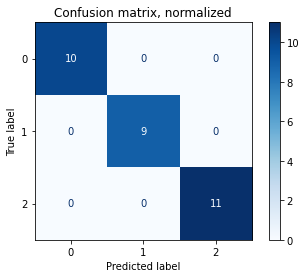

In [15]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

title_options= [("Confusion matrix, normalized", None)]

for title, normalize in title_options:
    disp= plot_confusion_matrix(knn_cl, x_test, y_test, cmap=plt.cm.Blues, normalize= normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()